In [1]:
from gp_1D import *


In [2]:
input_file = '../training_results/1D_500/train_inputs_log.json'
var_file = '../training_results/1D_500/train_outputs_var.json'
output_file = '../training_results/1D_500/train_outputs_mean.json'
input_type = 'I'
output_type = 'P'


In [3]:
gp = LPI_GP_1D(input_file = input_file, input_type = input_type,\
           output_file = output_file, output_type = output_type,\
           var_file = var_file, train_frac=0.2)

In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l =  0.11141913841958427 var =  3.182097384130214


In [6]:
# Y_star, err = gp.noise_GP_predict(gp.X_train, get_err = True)
# X_s = gp.X_train.flatten()
# Y_s = Y_star.flatten()
# plt.errorbar(X_s, Y_s, yerr = err.flatten(), fmt="o")
# plt.plot(gp.X_train, np.exp(gp.noise_train), 'kx')

In [7]:
gp.optimise_GP()

l =  0.3695405564738239 var =  2.7312044575796683


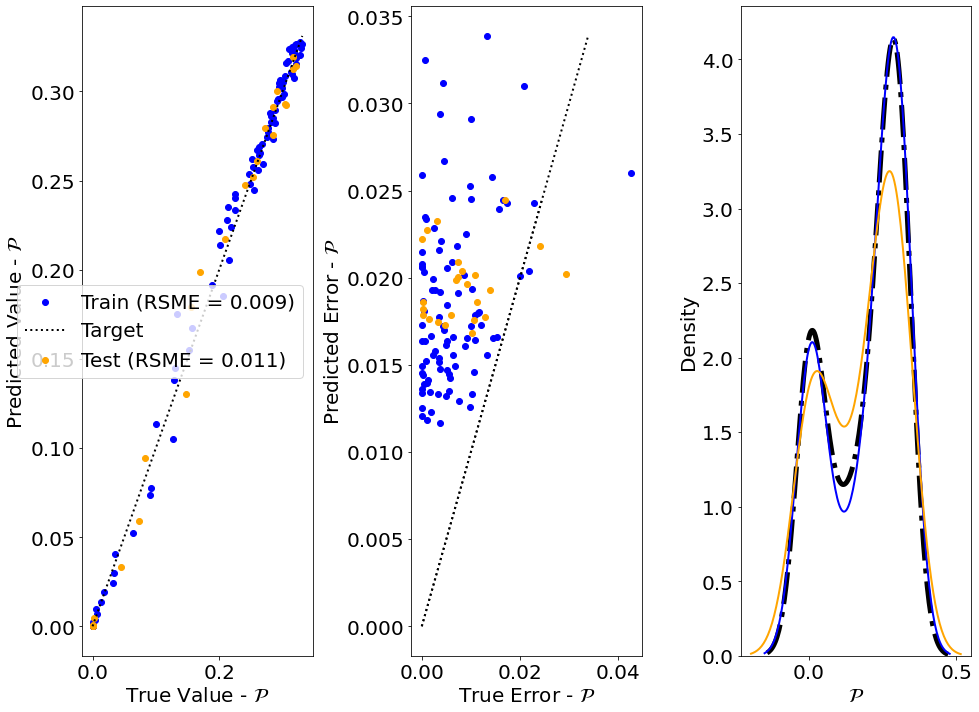

In [8]:
gp.test_train_plot()

In [9]:
X_star = np.geomspace(1e14, 1e16, 100)[:,None]


Y_star, V_epi, V_noise = gp.GP_predict(X_star, get_var=True)

In [10]:
X = np.exp(gp.get_input())
if output_type == 'T':
    Y = gp.get_output()
else:
    Y = np.exp(gp.get_output())

In [11]:
X_all = read_json_file('../training_results/1D_500/all_inputs.json')
Y_all = read_json_file('../training_results/1D_500/all_outputs.json')


In [12]:
if input_type == 'I':
    X_all = X_all[:,0]
if input_type == 'Ln':
    X_all = X_all[:,1]

if output_type == 'P':
    Y_all = Y_all[:,0].flatten()
if output_type == 'T':
    Y_all = Y_all[:,1].flatten()
if output_type == 'E':
    Y_all = Y_all[:,2].flatten()


 <ipython-input-27-a1cc49419823>:13: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
 <ipython-input-27-a1cc49419823>:14: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
 <ipython-input-27-a1cc49419823>:29: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
 <ipython-input-27-a1cc49419823>:30: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.


Text(0.5, 0, '$I_{L} \\,\\, W/cm^{2}$')

 /usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


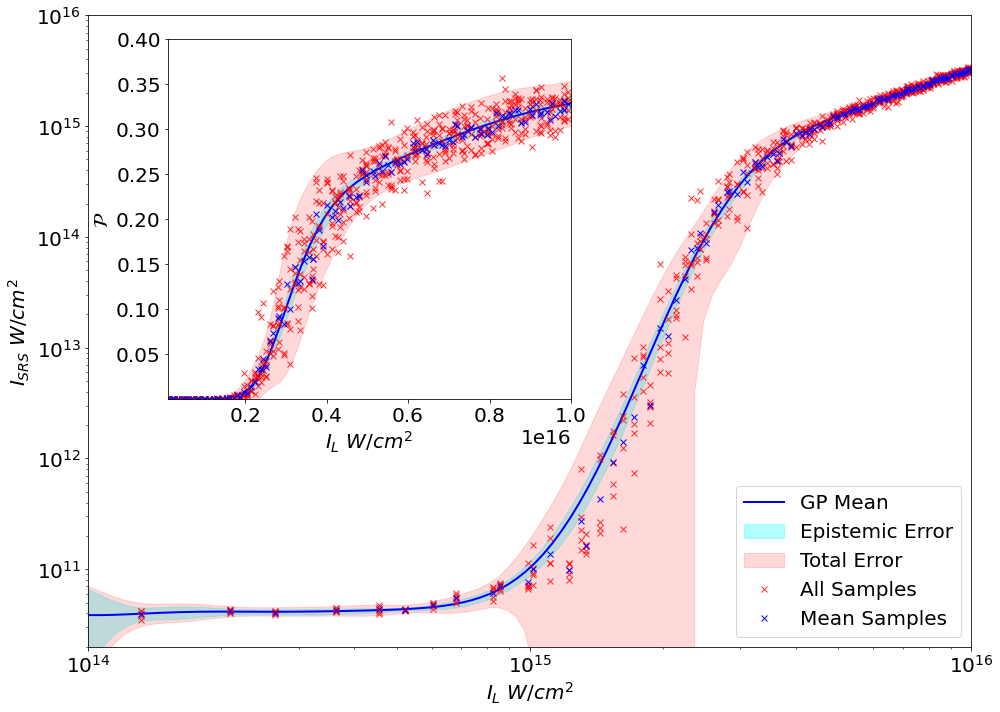

In [27]:
plt.rcParams["figure.figsize"] = [14, 10]

error_epi = 2.0*np.sqrt(V_epi)
error_tot = 2.0*np.sqrt(V_epi + V_noise)

Y_s = Y_star.flatten()
X_s = X_star.flatten()

fig, ax1 = plt.subplots()
ax1.loglog(X_s, Y_s*X_s, color = 'blue', label = 'GP Mean')
ax1.fill_between(X_s, (Y_s-error_epi)*X_s, (Y_s+error_epi)*X_s, alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
ax1.fill_between(X_s, (Y_s-error_tot)*X_s, (Y_s+error_tot)*X_s, alpha = 0.15, color = 'red', label = 'Total Error')
ax1.plot(X_all, Y_all*X_all, 'kx', color = 'red', label = 'All Samples', alpha = 0.8)
ax1.plot(X, Y*X, 'kx', color = 'blue', label = 'Mean Samples')
ax1.set_xlim(1e14, 1e16)

ax1.set_ylim(2e10, 1e16)
ax1.set_ylabel(r'$I_{SRS} \,\, W/cm^{2}$')
ax1.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')
ax1.legend(loc = 'lower right')


l, b, h, w = .17, .44, .5, .4
ax2 = fig.add_axes([l, b, w, h])

ax2.plot(X_s, Y_s, color = 'blue', label = 'GP Mean')
ax2.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
ax2.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red', label = 'Total Error')
ax2.plot(X_all, Y_all, 'kx', color = 'red', label = 'All Samples', alpha = 0.8)
ax2.plot(X, Y, 'kx', color = 'blue', label = 'Mean Samples')
ax2.set_xlim(1e14, 1e16)

ax2.set_ylim(5e-5, 0.4)
ax2.set_ylabel(r'$\mathcal{P}$')
ax2.set_xlabel(r'$I_{L} \,\, W/cm^{2}$')